## CASO PROBLEMA 1
####KEVIN PATINO , SEBASTIAN DIAZ, SEBASTIAN OQUENDO


# Librerias

In [ ]:
#tratamiento de datos
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import plotly.express as px

# preparación de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.impute import SimpleImputer
# modelos
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


# Evaluación
from sklearn.metrics import silhouette_score


# Advertencia
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv('/content/drive/MyDrive/Estadistica /datos_caso_1.csv', sep=';')
datos.head() # or print(datos)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos.shape

(2240, 29)

In [ ]:
datos.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
datos_modf = datos.copy()
datos_modf.drop(columns=['ID','Z_CostContact', 'Z_Revenue', 'Dt_Customer'], inplace=True)

datos_modf['Age'] = 2024 - datos_modf['Year_Birth']  # Suponiendo el año actual como 2024
datos_modf = datos_modf.drop(columns=['Year_Birth'])

In [ ]:
datos_modf.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,67
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,70
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,59
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,40
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,43


#Exploracion de datos de los datos

In [ ]:
# Seleccionar los datos segun su naturaleza
# las columnas que tengan el siguiente tipo de datos
numerical_columns = datos_modf.select_dtypes(include=['int64', 'float64']).columns

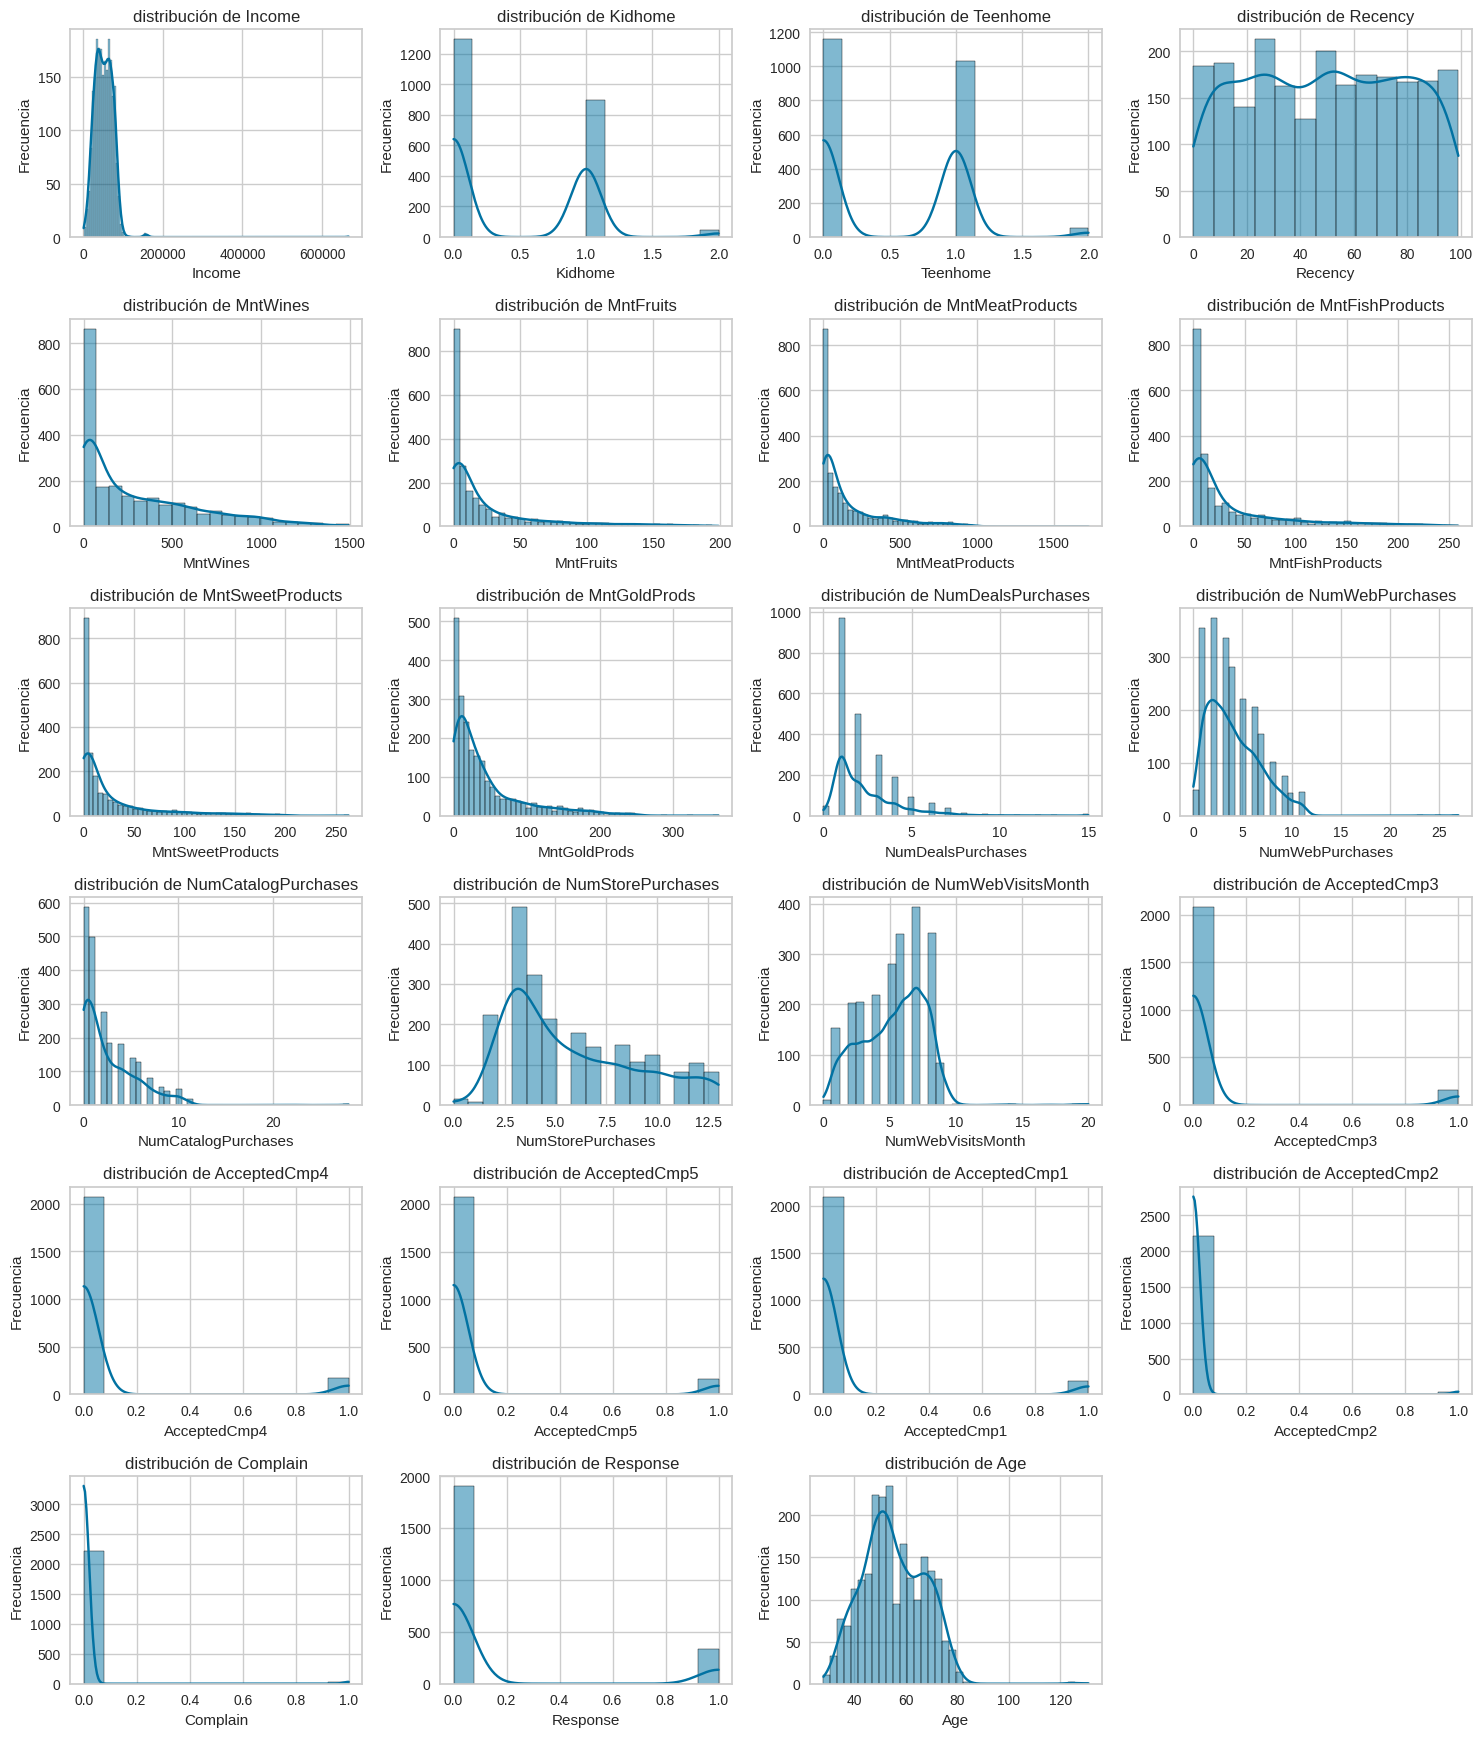

In [ ]:
# grafica de histogramas de las variables númericas
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(datos_modf[column], kde=True)
    plt.title(f'distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#En general, estos histogramas dan una buena visión de la concentración y dispersión de los datos en cada variable,
#y resaltan algunas distribuciones sesgadas y
#otras más uniformes o normales. Esto puede ser útil para comprender los patrones de consumo y segmentar los datos en diferentes grupos.


revisamos la distribución de Marital_Status mediante un gráfico de conteo.
Se visualiza la distribución de Education, también con un gráfico de conteo, con las etiquetas rotadas para mejor legibilidad, porque son de otro tipo.

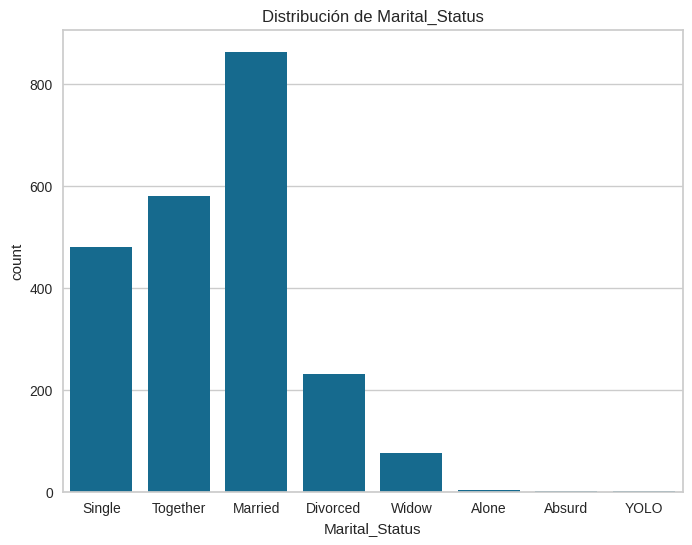

In [ ]:
# Gráfico de conteo para la variable 'Marital_Status'
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.countplot(data=datos_modf, x='Marital_Status')  # Gráfico de barras
plt.title('Distribución de Marital_Status')  # Título
plt.show()  # Mostrar gráfico
 #Este código crea un gráfico de barras para ver la distribución del estado civil (Marital_Status) en el DataFrame

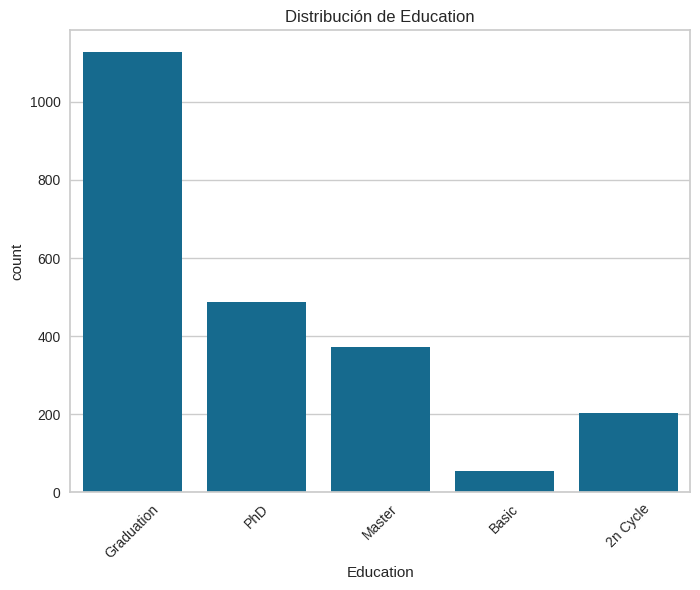

In [ ]:
# Gráfico de conteo para la variable 'Education'
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.countplot(data=datos_modf, x='Education')  # Gráfico de barras
plt.title('Distribución de Education')  # Título
plt.xticks(rotation=45)  # Rotación de etiquetas en el eje X
plt.show()  # Mostrar gráfico
 #Este gráfico permite ver cómo se distribuyen los clientes según su nivel educativo.

## Analisis Bivariado


Se crea un mapa de calor heatmap para visualizar la correlación entre las variables numéricas.
 1 indica una correlación positiva perfecta,
-1 indica una correlación negativa perfecta,
0 indica que no hay correlación.
los headmap  permiten visualizar el user engagement y cómo interactúan con la página

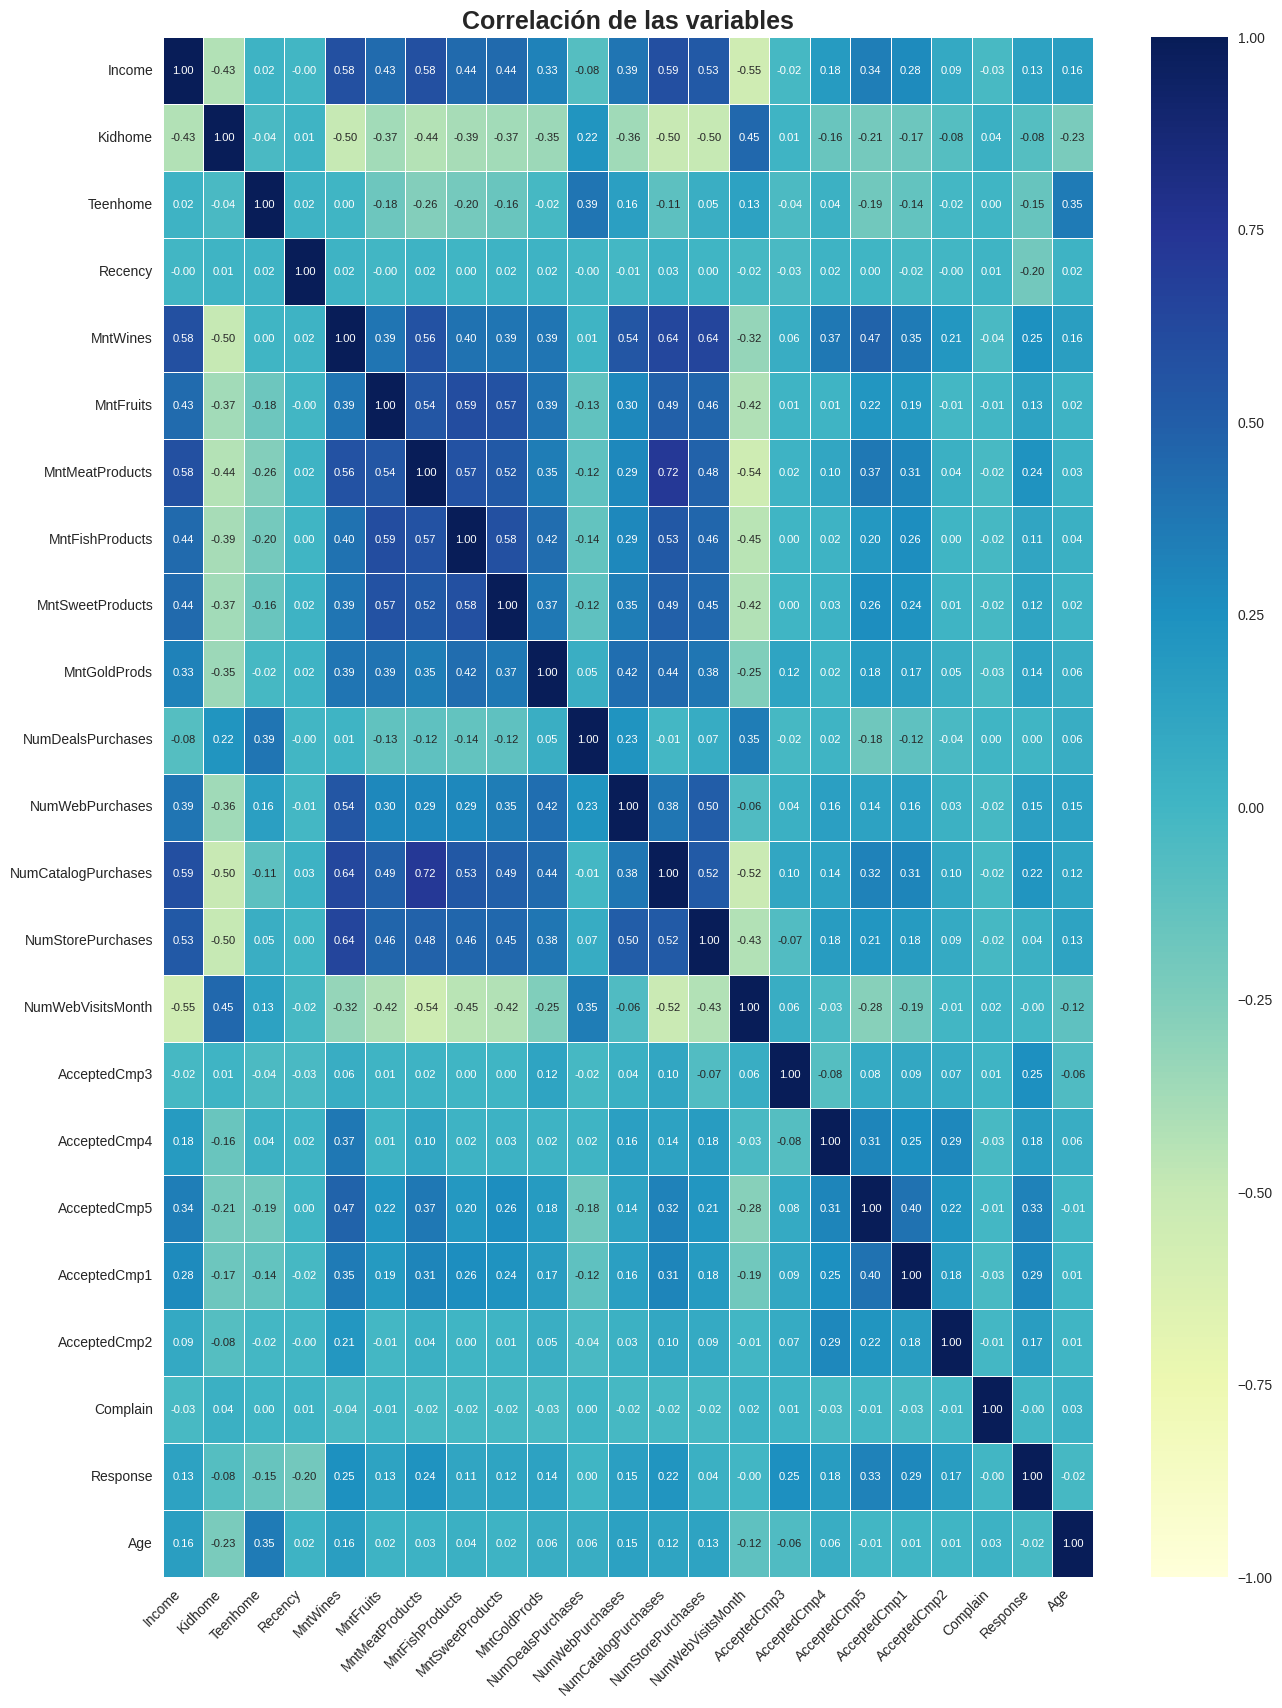

In [ ]:
plt.figure(figsize=(15, 20))  # Define el tamaño del gráfico.

sns.heatmap(
    datos_modf.corr(numeric_only=True),  # Calcula y grafica la correlación entre variables numéricas.
    annot=True,                         # Muestra los valores de correlación en las celdas.
    annot_kws={"size": 8},              # Ajusta el tamaño del texto de las anotaciones.
    cmap='YlGnBu',                      # Aplica colores según la intensidad de la correlación.
    fmt=".2f",                          # Muestra los valores con 2 decimales.
    linewidths=0.5,                     # Define grosor de las líneas entre celdas.
    vmin=-1, vmax=1                     # Escala de correlación de -1 a 1.
)

plt.title('Correlación de las variables', fontsize=18, fontweight='bold')  # Agrega título.
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rota etiquetas del eje X.
plt.yticks(fontsize=10)  # Ajusta el tamaño de las etiquetas del eje Y.
plt.show()  # Muestra el gráfico.

# Genera un mapa de calor que muestra cómo las variables numéricas están correlacionadas.
# Azul indica correlación positiva fuerte, amarillo correlación negativa fuerte, y verde débil o nula.


In [ ]:
# Calcular la matriz de correlación y filtrar las correlaciones significativas
correlation_matrix = datos_modf.corr(numeric_only=True)

# Convertir la matriz de correlación a un formato largo (pares de variables)
correlation_pairs = correlation_matrix.unstack()

# Filtrar pares con correlación alta (positiva o negativa), excluyendo las autocorrelaciones (1.0)
high_correlation_pairs = correlation_pairs[(correlation_pairs.abs() > 0.5) & (correlation_pairs.abs() < 1)].sort_values(ascending=False)

# Mostrar las correlaciones altas
high_correlation_pairs

,,0
MntMeatProducts,NumCatalogPurchases,0.723827
NumCatalogPurchases,MntMeatProducts,0.723827
NumStorePurchases,MntWines,0.642100
MntWines,NumStorePurchases,0.642100
NumCatalogPurchases,MntWines,0.635226
MntWines,NumCatalogPurchases,0.635226
MntFruits,MntFishProducts,0.594804
MntFishProducts,MntFruits,0.594804
Income,NumCatalogPurchases,0.589162
NumCatalogPurchases,Income,0.589162


Relaciones Positivas Notables:

MntMeatProducts y NumCatalogPurchases: 0.72

NumStorePurchases y MntWines: 0.64

NumCatalogPurchases y MntWines: 0.63

MntFishProducts y MntFruits: 0.59

Income y NumCatalogPurchases: 0.59

Income y MntMeatProducts: 0.58

MntWines y Income: 0.57

NumWebPurchases y MntWines: 0.54

Relaciones Negativas Notables:

Kidhome y NumCatalogPurchases: -0.50

NumCatalogPurchases y NumWebVisitsMonth: -0.52

MntMeatProducts y NumWebVisitsMonth: -0.54

Income y NumWebVisitsMonth: -0.55


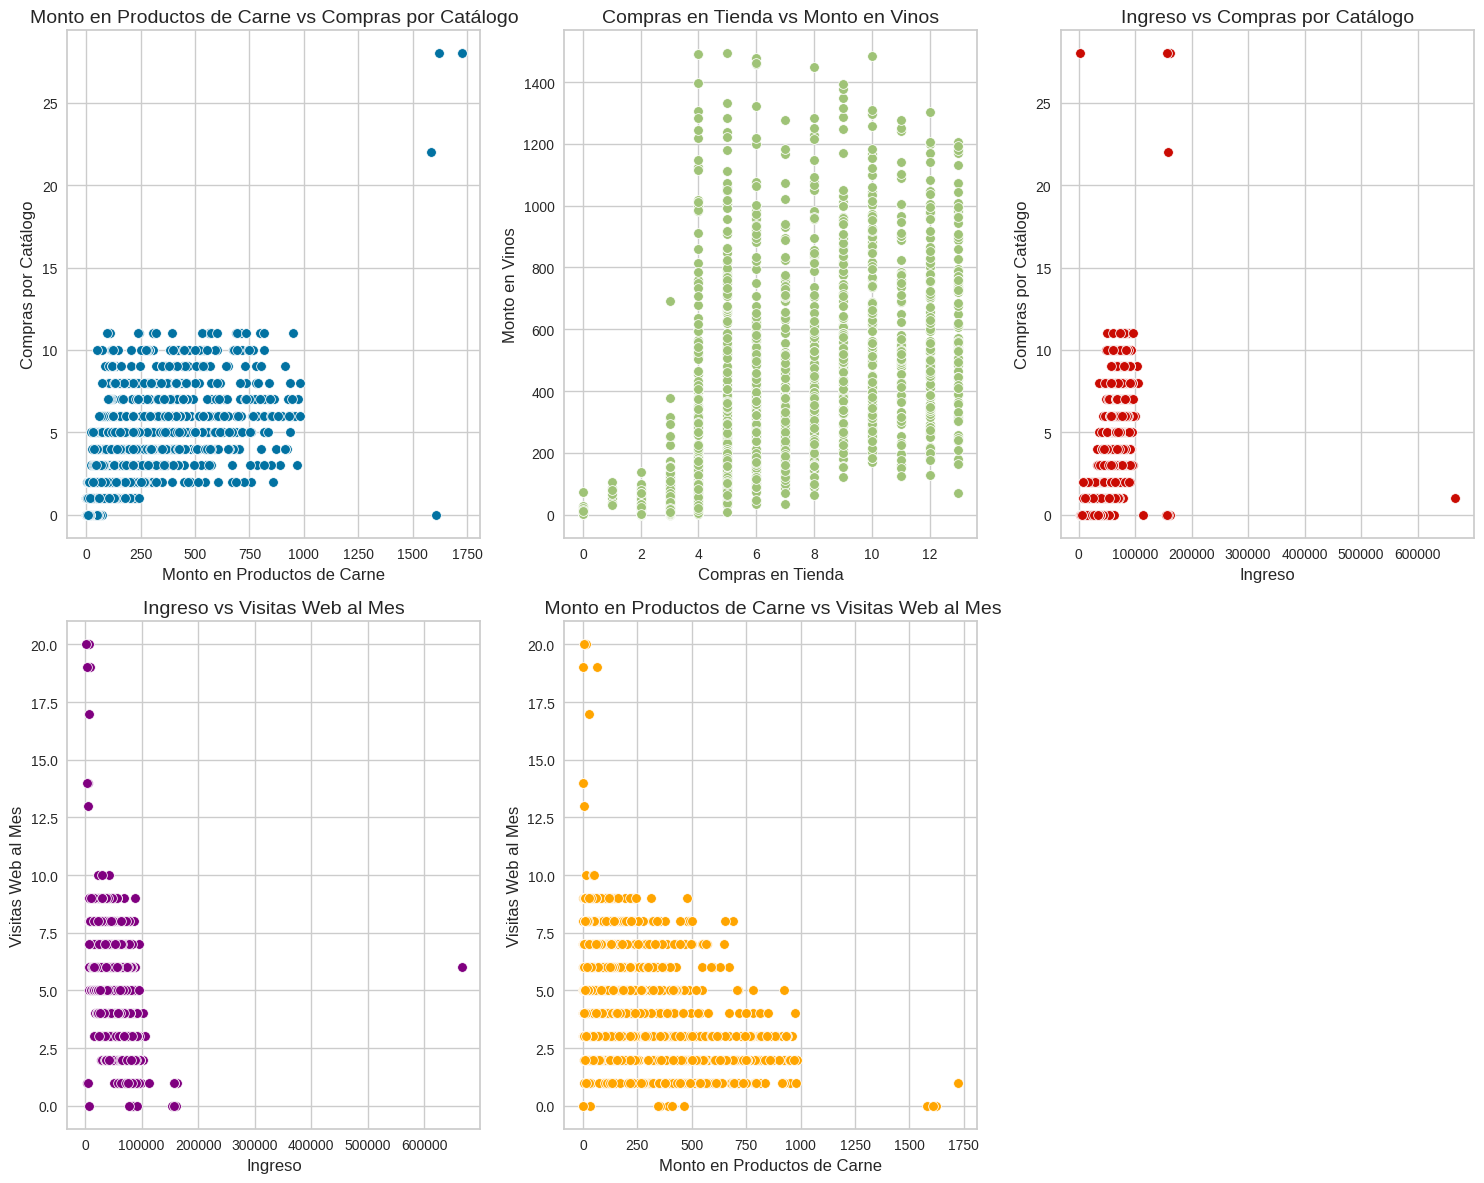

In [ ]:
plt.figure(figsize=(15, 12))  # Configura el tamaño de la figura.

# Monto en productos de carne vs Número de compras por catálogo
plt.subplot(2, 3, 1)  # Primer gráfico en una cuadrícula de 2 filas y 3 columnas.
sns.scatterplot(data=datos_modf, x='MntMeatProducts', y='NumCatalogPurchases', color="b")  # Dispersión de MntMeatProducts vs NumCatalogPurchases.
plt.title('Monto en Productos de Carne vs Compras por Catálogo', fontsize=14)
plt.xlabel('Monto en Productos de Carne', fontsize=12)
plt.ylabel('Compras por Catálogo', fontsize=12)

# Número de compras en tienda vs Monto en vinos
plt.subplot(2, 3, 2)  # Segundo gráfico.
sns.scatterplot(data=datos_modf, x='NumStorePurchases', y='MntWines', color="g")  # Dispersión de NumStorePurchases vs MntWines.
plt.title('Compras en Tienda vs Monto en Vinos', fontsize=14)
plt.xlabel('Compras en Tienda', fontsize=12)
plt.ylabel('Monto en Vinos', fontsize=12)

# Ingreso vs Compras por Catálogo
plt.subplot(2, 3, 3)  # Tercer gráfico.
sns.scatterplot(data=datos_modf, x='Income', y='NumCatalogPurchases', color="r")  # Dispersión de Income vs NumCatalogPurchases.
plt.title('Ingreso vs Compras por Catálogo', fontsize=14)
plt.xlabel('Ingreso', fontsize=12)
plt.ylabel('Compras por Catálogo', fontsize=12)

# Ingreso vs Visitas Web al Mes
plt.subplot(2, 3, 4)  # Cuarto gráfico.
sns.scatterplot(data=datos_modf, x='Income', y='NumWebVisitsMonth', color="purple")  # Dispersión de Income vs NumWebVisitsMonth.
plt.title('Ingreso vs Visitas Web al Mes', fontsize=14)
plt.xlabel('Ingreso', fontsize=12)
plt.ylabel('Visitas Web al Mes', fontsize=12)

# Monto en Productos de Carne vs Visitas Web al Mes
plt.subplot(2, 3, 5)  # Quinto gráfico.
sns.scatterplot(data=datos_modf, x='MntMeatProducts', y='NumWebVisitsMonth', color="orange")  # Dispersión de MntMeatProducts vs NumWebVisitsMonth.
plt.title(' Monto en Productos de Carne vs Visitas Web al Mes', fontsize=14)
plt.xlabel('Monto en Productos de Carne', fontsize=12)
plt.ylabel('Visitas Web al Mes', fontsize=12)

plt.tight_layout()  # Ajusta el espacio entre los gráficos.
plt.show()  # Muestra la figura completa.

# Salida esperada:
# El código genera 5 gráficos de dispersión organizados en una cuadrícula de 2x3.
# - Gráfico 1: Relación entre el monto gastado en productos de carne y el número de compras por catálogo.
# - Gráfico 2: Relación entre el número de compras en tienda y el monto gastado en vinos.
# - Gráfico 3: Relación entre el ingreso y el número de compras por catálogo.
# - Gráfico 4: Relación entre el ingreso y las visitas mensuales al sitio web.
# - Gráfico 5: Relación entre el monto gastado en productos de carne y las visitas mensuales al sitio web.
# Cada gráfico utiliza colores diferentes y tiene títulos y etiquetas descriptivas.


se usan las viriables Education e Income: Para ver la distribución de los ingresos en función del nivel de educación. Esto te permite observar cómo varían los ingresos entre los diferentes grupos educativos y detectar posibles diferencias o patrones.

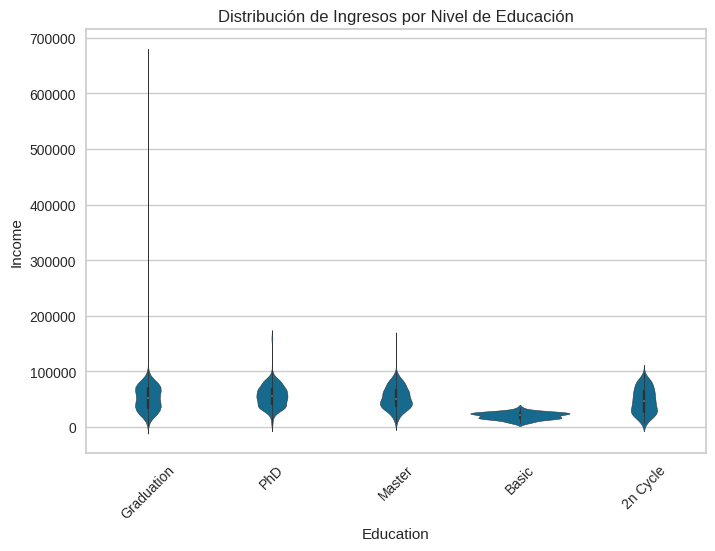

In [ ]:

sns.violinplot(x='Education', y='Income', data=datos_modf)  # Crea un gráfico de violín para visualizar la distribución de ingresos ('Income')
                                                            # según el nivel educativo ('Education') en el dataset 'datos_modf'.

plt.title('Distribución de Ingresos por Nivel de Educación')  # Agrega un título al gráfico para indicar el análisis representado.

plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados, útil si son largas o se superponen.

plt.show()  # Muestra el gráfico.

# Resultado esperado:
# Se genera un gráfico de violín donde:
# - Cada categoría de educación ('Education') aparece en el eje X.
# - La distribución de los ingresos ('Income') se muestra como "violines" que permiten visualizar la densidad,
#   la mediana y los rangos de los datos para cada categoría.


 para visualizar las relaciones entre múltiples variables  numéricas , Variables de Gasto (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds): para visualizar la relación entre los diferentes tipos de gastos y cómo varían según el género. identificar si hay diferencias en los patrones de gasto entre hombres y mujeres.

Variables Numéricas como Income, Age, NumStorePurchases, NumWebPurchases, NumCatalogPurchases: combinadas con las de gasto, tendremos una visión más completa de cómo los ingresos, la edad y los hábitos de compra se relacionan entre sí y con el género.

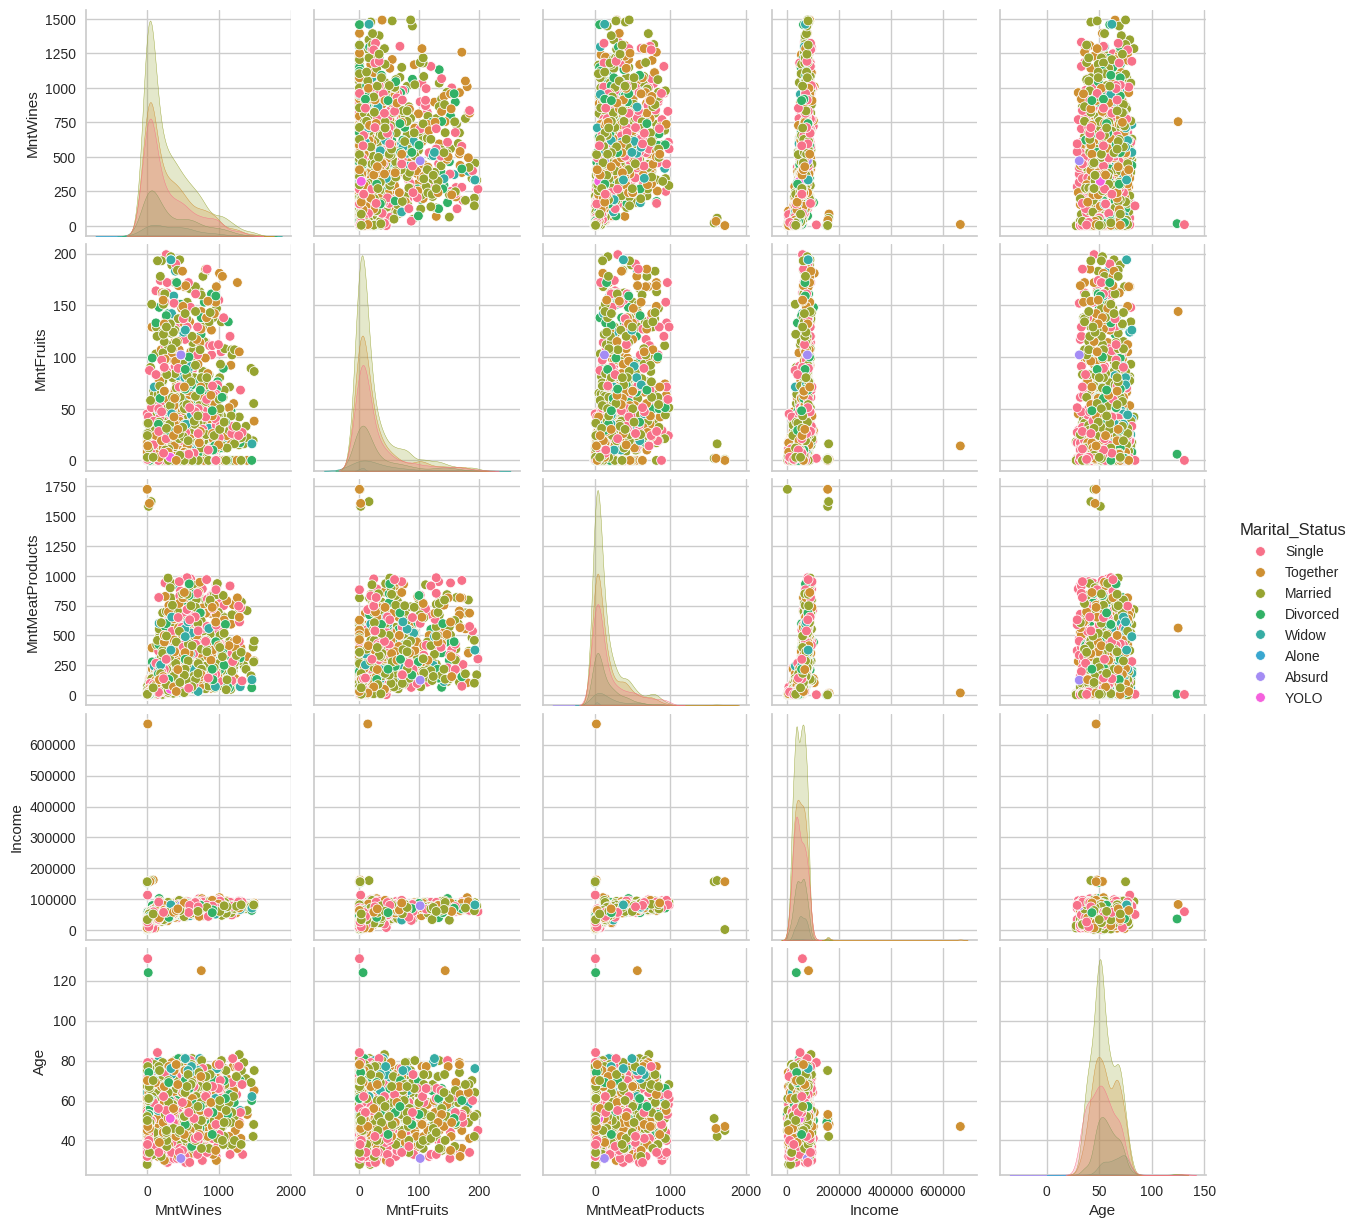

In [ ]:
# Selección de las variables
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'Income', 'Age']

# Creación del gráfico pairplot
# Se genera una matriz de gráficos para explorar relaciones entre las variables seleccionadas,
# separando por color según el estado civil ('Marital_Status').
sns.pairplot(datos_modf[variables + ['Marital_Status']], hue='Marital_Status')  # Se añade 'Marital_Status' para usarlo como hue
                                                                                # y diferenciar las categorías por color.

plt.show()  # Muestra el gráfico en pantalla.

# Resultado esperado:
# Una matriz de gráficos que permite:
# - Observar distribuciones individuales de las variables en la diagonal principal.
# - Identificar relaciones entre pares de variables en gráficos de dispersión.
# - Diferenciar las observaciones según las categorías de 'Marital_Status' gracias a los colores.


# PROCESAMIENTO

In [ ]:
numCols = datos_modf.select_dtypes(include=['float64', 'int64']).columns.to_list()
catCols = datos_modf.select_dtypes(include=['object']).columns.to_list()

numTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

catTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
])

# Opción 1: Mostrar el pipeline en formato de texto
print(preprocessor)

# Opción 2: Mostrar el pipeline con el parámetro verbose
set_config(display='diagram')
preprocessor

# Resultado esperado:
# - 'preprocessor' contiene un pipeline que aplica:
#   - Imputación y escalado a las columnas numéricas.
#   - Imputación y codificación one-hot a las columnas categóricas.
# - Con 'print(preprocessor)', se ve el pipeline en formato de texto.
# - Con 'preprocessor' y 'display="diagram"', se visualiza el pipeline en un diagrama (si el entorno lo permite).

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Income', 'Kidhome', 'Teenhome', 'Recency',
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts',
                                  'MntGoldProds', 'NumDealsPurchases',
                                  'NumWebPurchases', 'NumCatalogPurchases',
                                  'NumStorePurchases', 'NumWebVisitsMonth',
                                  'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Complain', 'Response',
                                  'Age']),
                                ('

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Income', 'Kidhome', 'Teenhome', 'Recency',
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts',
                                  'MntGoldProds', 'NumDealsPurchases',
                                  'NumWebPurchases', 'NumCatalogPurchases',
                                  'NumStorePurchases', 'NumWebVisitsMonth',
                                  'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Complain', 'Response',
                                  'Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education', 'Marital_Status'])])

In [ ]:
datosPre = preprocessor.fit_transform(datos_modf)
codCat = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCols, codCat])
datosPro = pd.DataFrame(datosPre, columns=labels)
datosPro

# Resultado esperado:
# - 'datosPro' es un DataFrame que contiene:
#   - Las columnas numéricas, escaladas entre 0 y 1.
#   - Las columnas categóricas, transformadas a través de codificación one-hot, con cada categoría representada como una columna binaria (0 o 1).
# - El DataFrame tiene las columnas etiquetadas correctamente, permitiendo un análisis o modelado más eficiente.

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# MODELACIÓN


##Metodo del codo

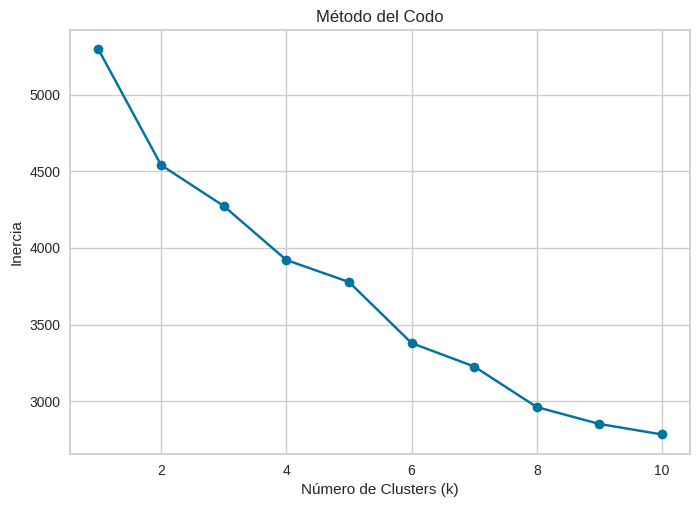

In [ ]:
def metodo_codo(datos, K_range):
    inertias = []
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(datos)
        inertias.append(kmeans.inertia_)

    plt.plot(K_range, inertias, marker='o')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo')
    plt.show()

K_range = range(1, 11)  # Prueba valores de k de 1 a 10
metodo_codo(datosPro, K_range)

# Resultado esperado:
# - El gráfico del "Método del Codo" mostrará la inercia para cada valor de k.
# - En el gráfico, el punto donde la inercia comienza a disminuir más lentamente (formando un "codo") es una buena elección para el número de clusters óptimo.
# - Este gráfico ayuda a identificar el número de clusters donde el modelo agrupa mejor los datos sin sobreajuste.



Usamos K = 4

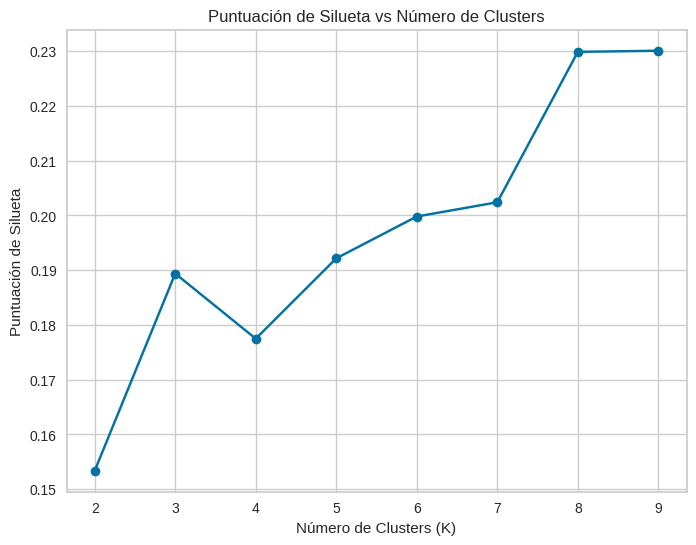

In [ ]:
puntuaciones = []
K_range = range(2, 10)

for k in K_range:
    modelo_kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = modelo_kmeans.fit_predict(datosPro)
    score = silhouette_score(datosPro, labels)
    puntuaciones.append(score)

plt.figure(figsize=(8, 6))
plt.plot(K_range, puntuaciones, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta vs Número de Clusters')
plt.show()

# Resultado esperado:
# - El gráfico mostrará la "Puntuación de Silueta" para cada número de clusters (K).
# - La puntuación de silueta evalúa la calidad de los clusters: valores cercanos a 1 indican buenos clusters bien separados.
# - Un valor óptimo de K sería donde la puntuación de silueta es máxima, lo que indica un agrupamiento más adecuado.

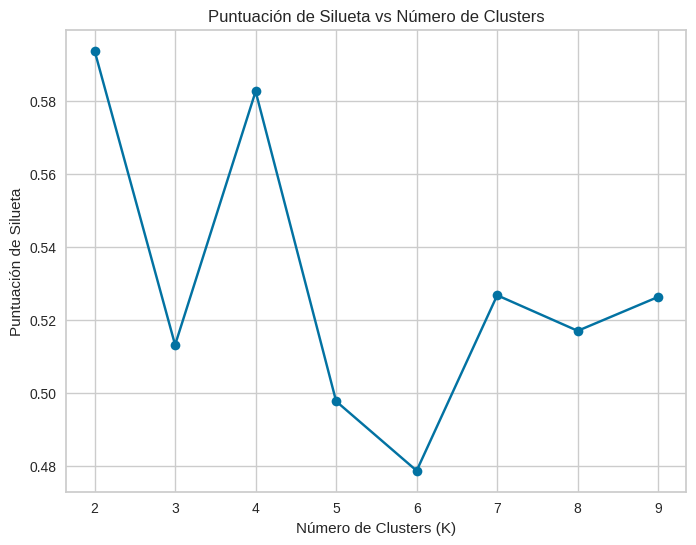

In [ ]:
# prompt: necesito sacar el puntaje de silueta

# Usamos K = 4
puntuaciones = []
K_range = range(2, 10)

for k in K_range:
    modelo_kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = modelo_kmeans.fit_predict(datosPro)
    score = silhouette_score(datosPro, labels)
    puntuaciones.append(score)

plt.figure(figsize=(8, 6))
plt.plot(K_range, puntuaciones, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta vs Número de Clusters')
plt.show()

#El código ya calcula y muestra la puntuación de silueta.
#Observa el gráfico generado para determinar el valor de K que maximiza la puntuación de silueta.
#Ese valor de K es el que indica el mejor número de clusters para tus datos.

##Modelos KMeans


     Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.084832      0.0       0.0  0.585859  0.425318   0.442211   
1  0.067095      0.5       0.5  0.383838  0.007368   0.005025   
2  0.105097      0.0       0.0  0.262626  0.285332   0.246231   
3  0.037471      0.5       0.0  0.262626  0.007368   0.020101   
4  0.085065      0.5       0.0  0.949495  0.115874   0.216080   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         0.316522         0.664093          0.334601      0.243094  ...   
1         0.003478         0.007722          0.003802      0.016575  ...   
2         0.073623         0.428571          0.079848      0.116022  ...   
3         0.011594         0.038610          0.011407      0.013812  ...   
4         0.068406         0.177606          0.102662      0.041436  ...   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     0.0                    1.0  

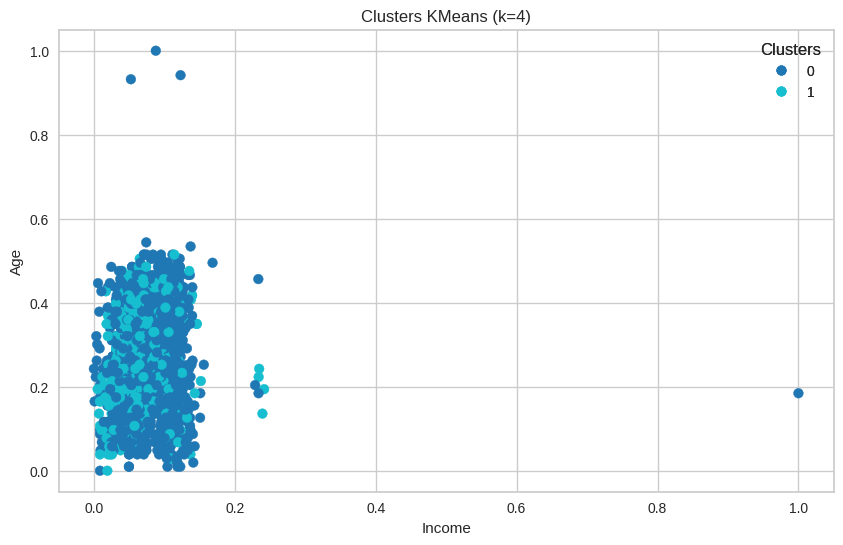

Silhouette Score: 0.5943440173288939


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Usar KMeans con k=4
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(datosPro)

# Agregar las etiquetas de cluster al DataFrame
datosPro['cluster'] = kmeans.labels_

# Mostrar los primeros registros del DataFrame con las etiquetas de cluster
print(datosPro.head())

# Visualizar los clusters con diferentes colores
plt.figure(figsize=(10, 6))
scatter = plt.scatter(datosPro['Income'], datosPro['Age'], c=datosPro['cluster'], cmap='tab10')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Clusters KMeans (k=4)')

# Añadir leyenda para diferenciar los clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

# Evaluar el modelo con la puntuación de Silueta
print(f"Silhouette Score: {silhouette_score(datosPro, kmeans.labels_)}")


# Resultado esperado:
# - El DataFrame `datosPro` tendrá una nueva columna llamada 'cluster' con valores de 0 a 3, indicando el cluster asignado a cada registro.
# - Se mostrará un gráfico de dispersión con los puntos coloreados según el cluster.
# - Se imprimirá la puntuación de Silueta, que generalmente estará en el rango de 0 a 1.
#   Un ejemplo podría ser: `Silhouette Score: 0.45`
# - Una puntuación cercana a 1 indica buenos clusters bien separados.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 1. Identificar columnas no numéricas
non_numeric_cols = datosPro.select_dtypes(exclude=['number']).columns

# 2. Convertir columnas no numéricas a numéricas usando Label Encoding
for col in non_numeric_cols:
    # Crear un objeto LabelEncoder
    encoder = LabelEncoder()

    # Ajustar el encoder a los valores únicos en la columna
    encoder.fit(datosPro[col])

    # Transformar la columna usando el encoder
    datosPro[col] = encoder.transform(datosPro[col])

# 3. Aplicar el clustering KMeans con 2 clusters
modelo_Kmeans = KMeans(n_clusters=2, random_state=42, n_init=25)
modelo_Kmeans.fit(datosPro)
grupos = modelo_Kmeans.predict(datosPro)

# 4. Crear una copia del DataFrame original y agregar las etiquetas de clúster
datosGrupos = datos_modf.copy()
datosGrupos['Grupos Kmeans'] = grupos

datosGrupos.sample(20)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Grupos Kmeans
1340,Graduation,Together,50127.0,0,1,88,274,0,21,4,...,6,0,1,0,0,0,0,0,62,0
1183,Basic,Single,15056.0,1,1,76,6,12,3,21,...,5,0,0,0,0,0,0,0,66,1
1493,Graduation,Together,57867.0,1,0,48,344,35,178,15,...,6,0,0,0,0,0,0,0,46,0
329,PhD,Single,29999.0,1,0,22,68,7,59,10,...,8,0,0,0,0,0,0,0,38,1
348,Graduation,Widow,30372.0,1,1,33,15,0,12,7,...,7,0,0,0,0,0,0,0,53,0
1532,PhD,Married,69283.0,0,1,41,674,62,134,0,...,5,0,0,0,0,0,0,0,49,0
1638,Graduation,Married,44078.0,1,1,17,24,1,10,2,...,5,0,0,0,0,0,0,0,55,0
954,Master,Together,46106.0,1,1,84,30,0,8,2,...,6,0,0,0,0,0,0,0,48,1
2058,Graduation,Married,59462.0,0,1,29,724,17,143,0,...,7,0,0,0,0,0,0,0,74,1
749,2n Cycle,Married,63564.0,0,0,0,769,80,252,15,...,6,1,0,0,0,0,0,1,70,0


#DBSCAN


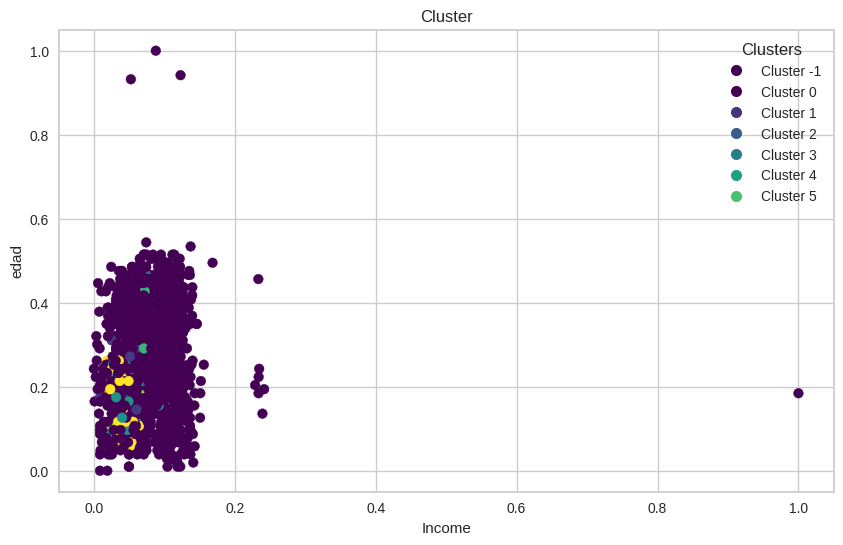

cluster_dbscan_limited
-1    2033
 5      74
 2      51
 4      26
 0      23
 1      18
 3      15
Name: count, dtype: int64


In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
datosPro['cluster_dbscan'] = dbscan.fit_predict(datosPro)

# Limite de  6 clusters
datosPro['cluster_dbscan_limited'] = datosPro['cluster_dbscan']
for i in range(6, len(np.unique(datosPro['cluster_dbscan']))):
    datosPro['cluster_dbscan_limited'] = np.where(datosPro['cluster_dbscan_limited'] == i, -1, datosPro['cluster_dbscan_limited'])


# Visualizar los clusters con colores diferentes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(datosPro['Income'], datosPro['Age'], c=datosPro['cluster_dbscan_limited'], cmap='viridis')

legend_elements = []
unique_clusters = np.unique(datosPro['cluster_dbscan_limited'])
for cluster_label in unique_clusters:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster_label}', markerfacecolor=plt.cm.viridis(cluster_label / len(unique_clusters)), markersize=8))

plt.legend(handles=legend_elements, title='Clusters')


plt.xlabel('Income')
plt.ylabel('edad')
plt.title('Cluster')
plt.show()

#Print the number of points in each cluster
print(datosPro['cluster_dbscan_limited'].value_counts())

# Resultado esperado:
# - El DataFrame `datosPro` tendrá una nueva columna llamada 'cluster_dbscan' con etiquetas de clusters asignadas por DBSCAN.
# - Los puntos etiquetados como -1 representan ruido (datos que no pertenecen a ningún cluster).
# - Otra columna 'cluster_dbscan_limited' limita a 6 clusters para mejor visualización.
# - El gráfico mostrará clusters con diferentes colores, y los puntos de ruido serán etiquetados como -1.
# - La salida del conteo de puntos podría ser algo como:
#   ```
#   -1    50
#    0    150
#    1    120
#    2    80
#    3    60
#    4    40
#    5    30
#   ```
#   Esto muestra la cantidad de puntos por cluster, con puntos de ruido (-1).

La mayoría de los clientes están concentrados en un área de bajos ingresos y edades relativamente jóvenes,el grueso de la base de clientes es relativamente joven y tiene ingresos moderados a bajos.

In [ ]:
modelo_dbscan = DBSCAN(eps=1.2, min_samples=2)
grupos_dbscan = modelo_dbscan.fit_predict(datosPro)

# Crea una nueva columna en el DataFrame para almacenar los grupos DBSCAN
datosPro["Grupo DBSCAN"] = grupos_dbscan

# Muestra el DataFrame con la nueva columna
datosPro

# Resultado esperado:
# - El DataFrame `datosPro` tendrá una nueva columna llamada 'Grupo DBSCAN'.
# - Esta columna contendrá las etiquetas de los clusters asignados por DBSCAN:
#   - Los valores serán enteros (por ejemplo, 0, 1, 2...) para los clusters encontrados.
#   - Los puntos etiquetados como `-1` son considerados **ruido** (outliers).

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster,cluster_dbscan,cluster_dbscan_limited,Grupo DBSCAN
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,1.0,0.0,0.0,0.0,0,-1,-1,0
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,2
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,...,0.0,0.0,0.0,1.0,0.0,0.0,0,2,2,3
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,...,0.0,1.0,0.0,0.0,0.0,0.0,1,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,...,0.0,1.0,0.0,0.0,0.0,0.0,0,-1,-1,27
2236,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,...,0.0,0.0,0.0,1.0,0.0,0.0,1,-1,-1,7
2237,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,...,1.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1,10
2238,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,...,0.0,0.0,0.0,1.0,0.0,0.0,1,44,-1,73


In [ ]:
print(datosPro["cluster_dbscan_limited"].value_counts())
#Este código muestra la cantidad de puntos pertenecientes a cada cluster, incluyendo el ruido etiquetado como -1.
#El resultado será una serie de pandas con el número de puntos por cada etiqueta de cluster.

cluster_dbscan_limited
-1    2033
 5      74
 2      51
 4      26
 0      23
 1      18
 3      15
Name: count, dtype: int64


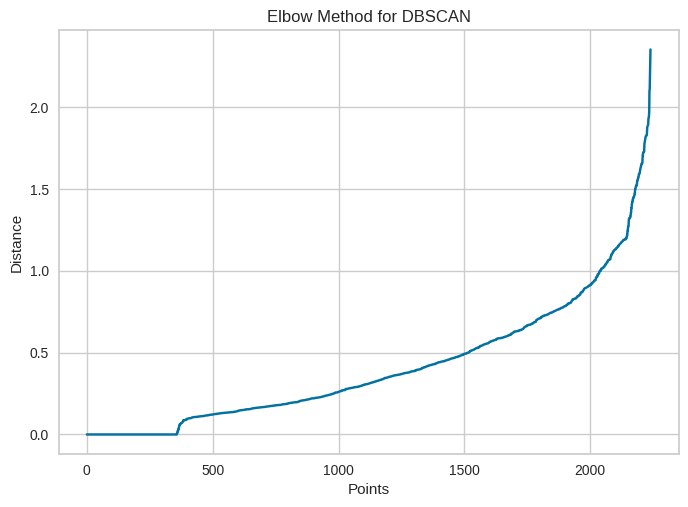

In [ ]:
# prompt: Hacer grafico de codo para determinar epsilon de DBSCAN

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def optimal_epsilon_dbscan(data, min_samples):
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title('Elbow Method for DBSCAN')
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.show()

optimal_epsilon_dbscan(datosPro, 5) # Reemplaza 5 con tu valor de min_samples

#El gráfico mostrará una curva que comienza con distancias pequeñas y luego aumenta abruptamente.
#El punto de inflexión (codo) es el valor sugerido para eps.
#Interpretación: Busca el punto donde la curva tiene un cambio pronunciado; ese será el valor óptimo para eps.

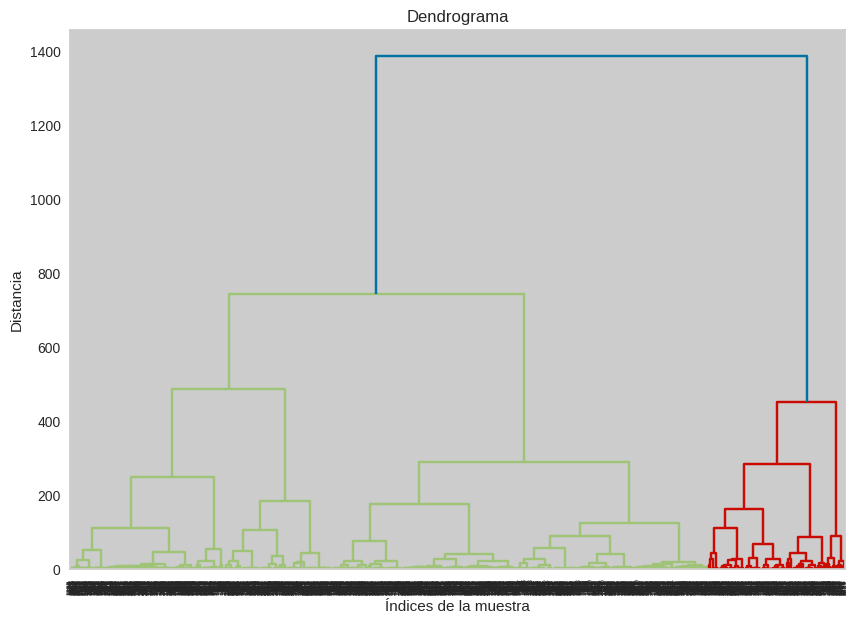

In [ ]:
# prompt: Hacer un agrupamiento jerarjico y hacer dendograma

# Agrupamiento jerárquico
linked = linkage(datosPro, 'ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancia')
plt.show()

In [ ]:

X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.6, random_state=0)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

# Clustering jerárquico para el dendrograma
linked = linkage(X, method='ward')

# Imprimir puntajes
print(f"Silhouette Score KMeans: {kmeans_silhouette}")
print(f"Silhouette Score DBSCAN: {dbscan_silhouette}")
print(f"Silhouette Score Dendrograma: {dendrogram_silhouette}")


Silhouette Score KMeans: 0.5475157249491575
Silhouette Score DBSCAN: 0.5329409358975012
Silhouette Score Dendrograma: -0.13228808532512584


           Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
cluster                                                                
0        0.076665  0.222272  0.247116  0.505409  0.190401   0.154646   
1        0.075244  0.221923  0.259209  0.486582  0.216912   0.109415   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0               0.104052         0.166602          0.119267      0.140467   
1               0.089422         0.122896          0.086329      0.102510   

         ...  Marital_Status_Alone  Marital_Status_Divorced  \
cluster  ...                                                  
0        ...              0.000887                 0.105590   
1        ...              0.001797                 0.101527   

         Marital_Status_Married  Marital_Status_Single  \
cluster                                                  
0                      0.384206  

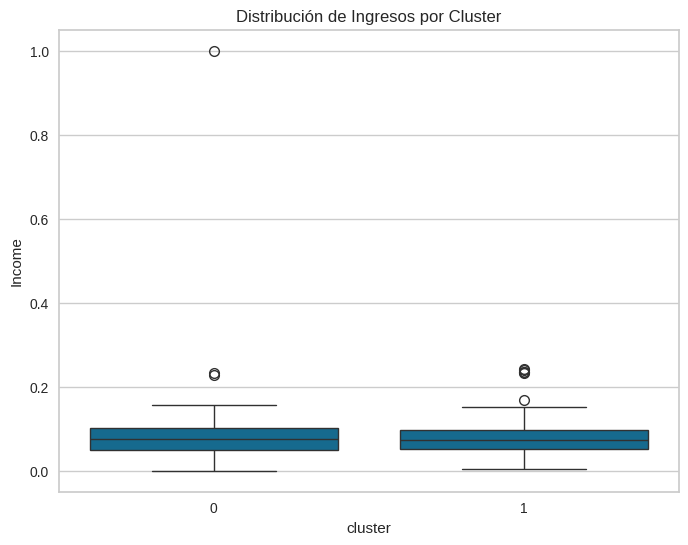

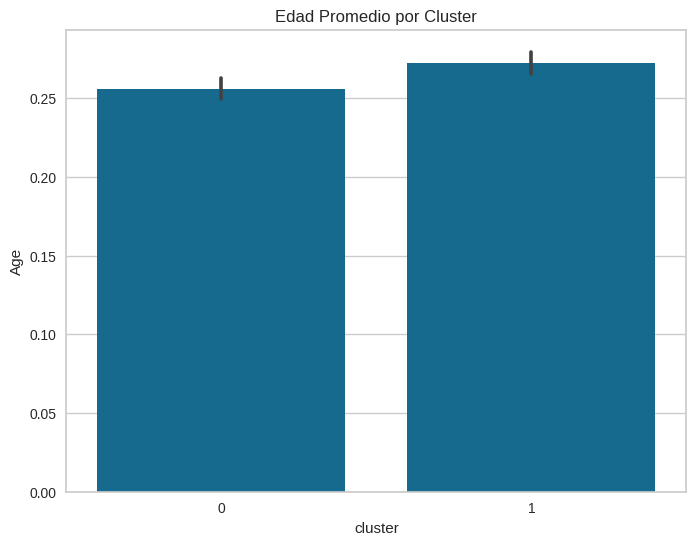

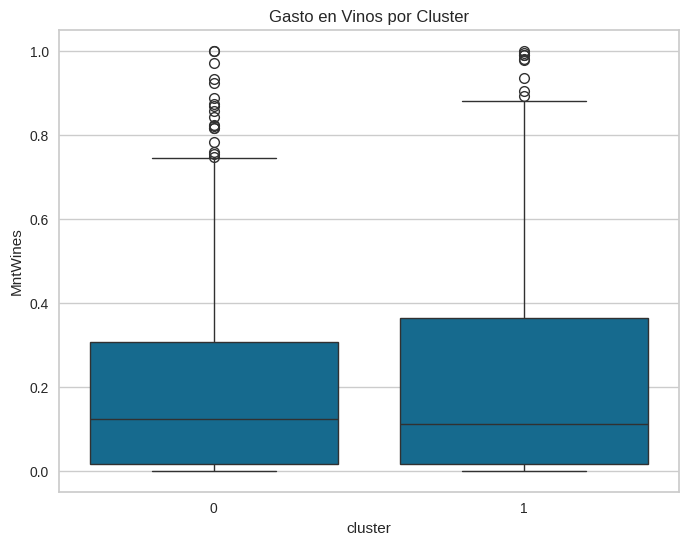

In [ ]:
# Análisis de Clusteres
# Calcula la media/mediana de las características para cada clúster
cluster_profile = datosPro.groupby('cluster').mean()
print(cluster_profile)

# Visualizaciones para el perfilado de clústeres
# Diagrama de caja para 'Income'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='Income', data=datosPro)
plt.title('Distribución de Ingresos por Cluster')
plt.show()

# Gráfico de barras para 'Age'
plt.figure(figsize=(8, 6))
sns.barplot(x='cluster', y='Age', data=datosPro)
plt.title('Edad Promedio por Cluster')
plt.show()

# Puedes crear más visualizaciones para otras características relevantes
# Ejemplo con 'MntWines'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='MntWines', data=datosPro)
plt.title('Gasto en Vinos por Cluste')
plt.show()

# Resultado esperado:
# - Un diagrama de caja que muestra la distribución del gasto en vinos por cluster.
# - Podrás ver cuál cluster gasta más en vinos y si existen valores atípicos (outliers).


##COMO DIFERENCIAAR LOS COLORES analizis de los cluster agrupando por la mejor variable o agrupacion

codigo para la agrupacion de los clopusters


Definicion del Metodo


sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='ONEOFF_PURCHASES', palette='viridis')

